# Modeling: unifying DataFrames 

Here I'll unify dataframes that will be the input of the models. Data is not treated yet, I'll do that later, prior to creating the model.

Data unified is that about positives, vaccination and ICUs.

In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
#libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.read_csv('/work/covid-19-EC-provinces/data/processed/deaths.csv')

,provincia,total,acumuladas,lat,lng,mes,year,poblacion
0,Azuay,327,327,-2.897414,-79.004481,1,2015,NaN
1,Bolívar,57,57,-1.605556,-79.003056,1,2015,NaN
2,Carchi,63,63,0.812180,-77.716330,1,2015,NaN
3,Cañar,87,87,-2.733333,-78.833333,1,2015,NaN
4,Chimborazo,156,156,-1.674347,-78.648294,1,2015,NaN
...,...,...,...,...,...,...,...,...
2035,Santa Elena,62,1629,-2.226700,-80.858300,11,2021,401178.0
2036,Sto. Domingo Tsáchilas,119,2791,-0.254167,-79.171944,11,2021,511151.0
2037,Sucumbíos,21,839,0.084722,-76.882778,11,2021,230503.0
2038,Tungurahua,140,3725,-1.241667,-78.619722,11,2021,590600.0


In [4]:
df_positives = pd.read_csv('/work/covid-19-EC-provinces/data/interim/positives.csv')

In [5]:
df_vaccinated = pd.read_csv('/work/covid-19-EC-provinces/data/interim/vaccinated.csv')

In [6]:
df_icu = pd.read_csv('/work/covid-19-EC-provinces/data/interim/icu.csv')

In [7]:
df_positives.columns

Index(['created_at', 'provincia', 'poblacion', 'total', 'nuevas', 'lat', 'lng',
       'year', 'month', 'day', 'day_of_week', 'quarter'],
      dtype='object')

In [8]:
df_vaccinated.columns

Index(['fecha', 'dosis_total', 'primera_dosis', 'segunda_dosis', 'refuerzo',
       'primera_dosis_diff', 'segunda_dosis_diff', 'refuerzo_diff',
       'dosis_total_diff'],
      dtype='object')

In [9]:
df_icu.columns

Index(['date', '(MSP) UCI Porcentaje Ocupadas',
       '(RPIS) UCI Porcentaje Ocupadas', '(RPC) UCI Porcentaje Ocupadas'],
      dtype='object')

In [10]:
df_positives.created_at = pd.to_datetime(df_positives.created_at, format='%Y/%m/%d')

In [11]:
df_vaccinated.fecha = pd.to_datetime(df_vaccinated.fecha, format='%Y/%m/%d')

In [12]:
df_icu.date = pd.to_datetime(df_icu.date, format='%Y/%m/%d')

In [13]:
df_positives.rename(columns={'created_at': 'date'}, inplace=True)
df_vaccinated.rename(columns={'fecha': 'date'}, inplace=True)

In [14]:
df_vaccinated['year'] = df_vaccinated.date.dt.year

In [15]:
df_icu['year'] = df_icu.date.dt.year

In [16]:
df_positives['day_of_year'] = df_positives.date.dt.day_of_year
df_vaccinated['day_of_year'] = df_vaccinated.date.dt.day_of_year
df_icu['day_of_year'] = df_icu.date.dt.day_of_year

In [17]:
grouped_positives = df_positives.groupby(['year', 'day_of_year'])[['nuevas']].sum()

In [18]:
grouped_vaccinated = df_vaccinated.groupby(['year', 'day_of_year'])[['dosis_total_diff', 'primera_dosis_diff', 'segunda_dosis_diff', 'refuerzo_diff']].sum()

In [19]:
grouped_icu = df_icu.groupby(['year', 'day_of_year'])[['(MSP) UCI Porcentaje Ocupadas', '(RPIS) UCI Porcentaje Ocupadas', '(RPC) UCI Porcentaje Ocupadas']].sum()

In [20]:
grouped_positives

nuevas
year day_of_year        
2020 73               23
     74                5
     75               11
     76               21
     77               53
...                  ...
2021 346             267
     347             131
     348             588
     349             581
     350             657

[644 rows x 1 columns]

In [21]:
grouped_vaccinated

dosis_total_diff  primera_dosis_diff  segunda_dosis_diff  \
year day_of_year                                                             
2021 20                        0.0                 0.0                 0.0   
     21                        0.0                 0.0                 0.0   
     22                      108.0               108.0                 0.0   
     27                     2874.0              2874.0                 0.0   
     35                     3246.0              3246.0                 0.0   
...                            ...                 ...                 ...   
     345                   52754.0             11066.0             29434.0   
     346                   31764.0              6456.0             16342.0   
     347                  111430.0             17088.0             70415.0   
     348                  102176.0             17897.0             63582.0   
     349                  115950.0             21738.0             70351.0   

                  refuerzo_diff  
year day_of_year                 
2021 20                     0.0  
     21                     0.0  
     22                     0.0  
     27                     0.0  
     35                     0.0  
...                         ...  
     345                12254.0  
     346                 8966.0  
     347                23927.0  
     348                20697.0  
     349                23861.0  

[242 rows x 4 columns]

In [22]:
grouped_icu

(MSP) UCI Porcentaje Ocupadas  \
year day_of_year                                  
2021 182                                      0   
     183                                      0   
     184                                      0   
     185                                      0   
     186                                      0   
...                                         ...   
     346                                     53   
     347                                     55   
     348                                     55   
     349                                     52   
     350                                     51   

                  (RPIS) UCI Porcentaje Ocupadas  \
year day_of_year                                   
2021 182                                       0   
     183                                       0   
     184                                       0   
     185                                       0   
     186                                       0   
...                                          ...   
     346                                      76   
     347                                      76   
     348                                      74   
     349                                      76   
     350                                      75   

                  (RPC) UCI Porcentaje Ocupadas  
year day_of_year                                 
2021 182                                      0  
     183                                      0  
     184                                      0  
     185                                      0  
     186                                      0  
...                                         ...  
     346                                     22  
     347                                     22  
     348                                     25  
     349                                     22  
     350                                     22  

[169 rows x 3 columns]

In [23]:
df = grouped_positives.merge(grouped_vaccinated, on=['year', 'day_of_year'], how='outer').merge(grouped_icu, on=['year', 'day_of_year'], how='outer')

In [24]:
sns.set_theme()

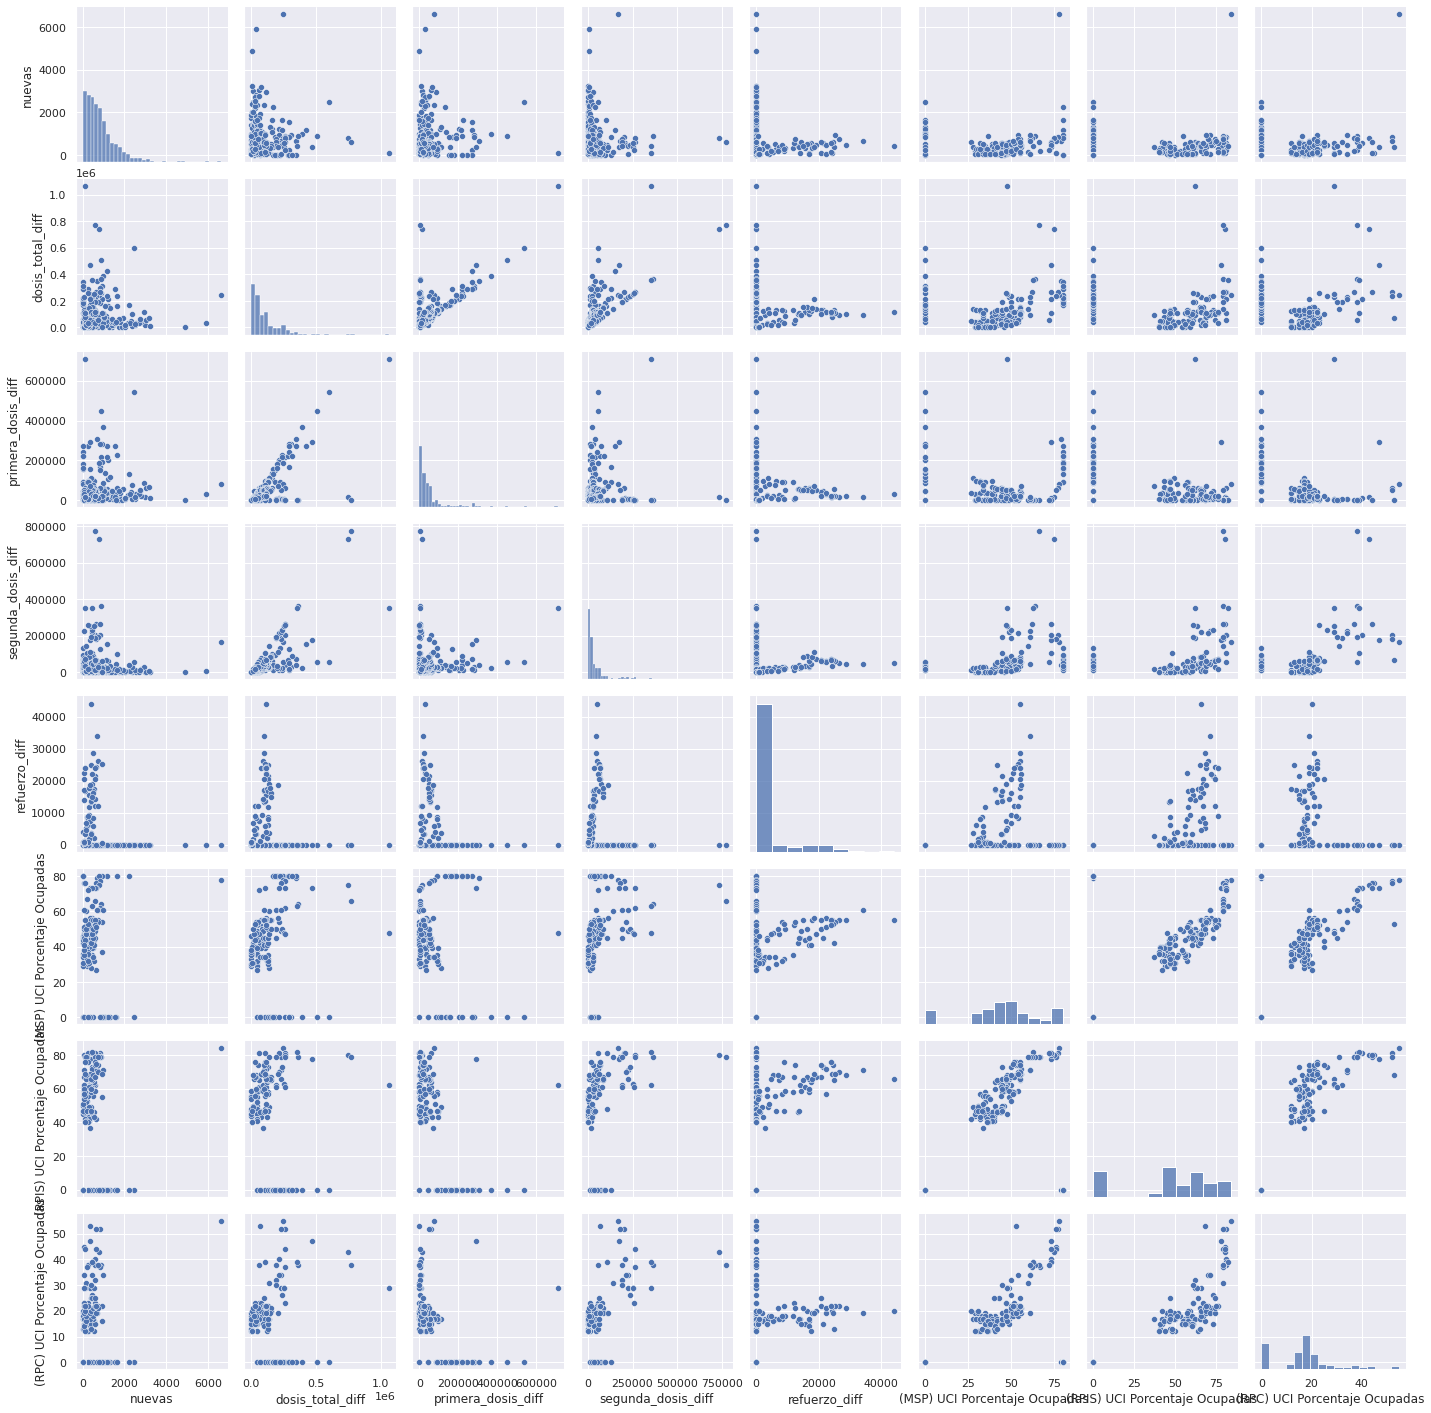

In [25]:
sns.pairplot(df)

### Handling missing data

In [26]:
df.reset_index().isnull().sum()

year                                0
day_of_year                         0
nuevas                              0
dosis_total_diff                  402
primera_dosis_diff                402
segunda_dosis_diff                402
refuerzo_diff                     402
(MSP) UCI Porcentaje Ocupadas     475
(RPIS) UCI Porcentaje Ocupadas    475
(RPC) UCI Porcentaje Ocupadas     475
dtype: int64

There's a lot of missing data. But it can be handled without dropping rows nor columns. Let's visualize missing data so as to have a better idea of this.

In [27]:
import missingno as msno

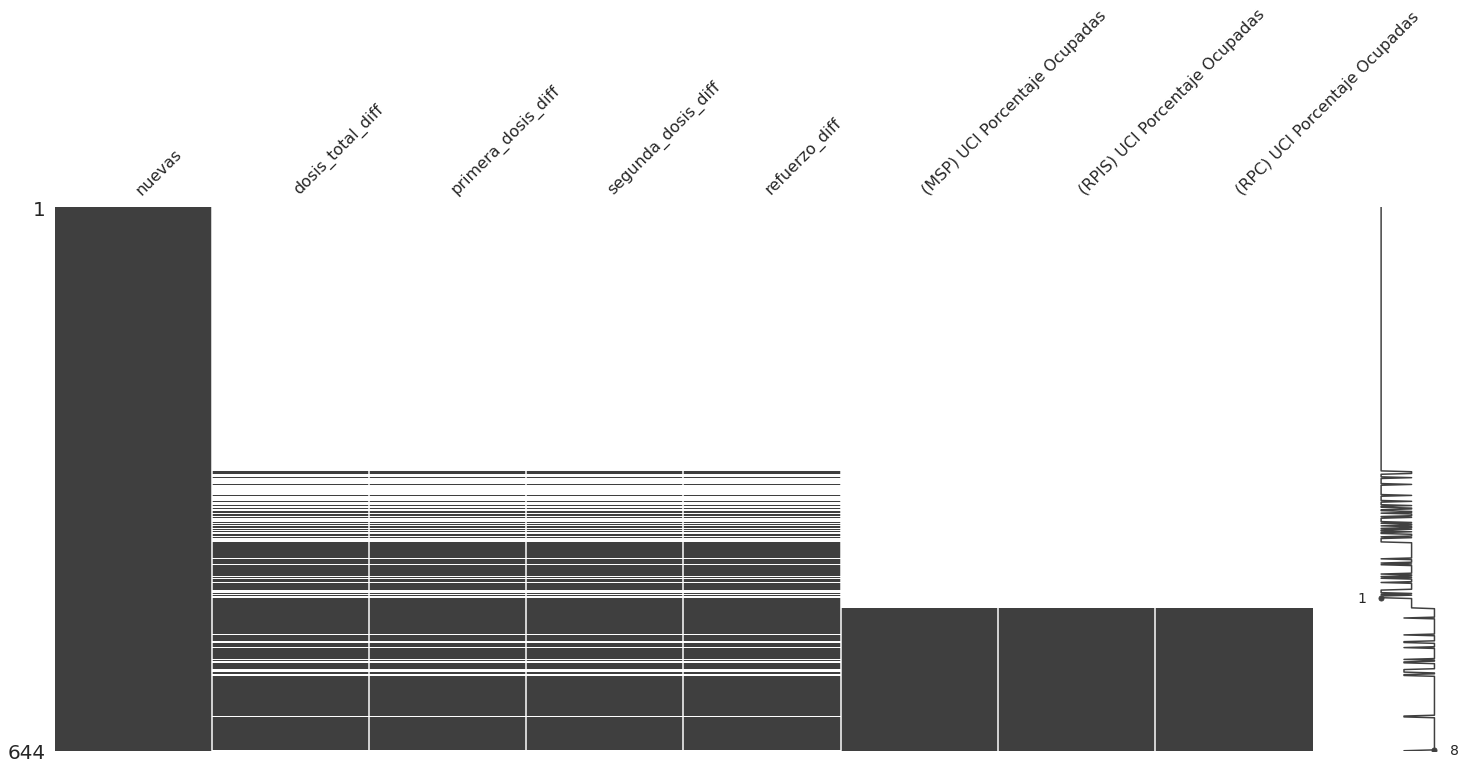

In [28]:
msno.matrix(df)
plt.show()

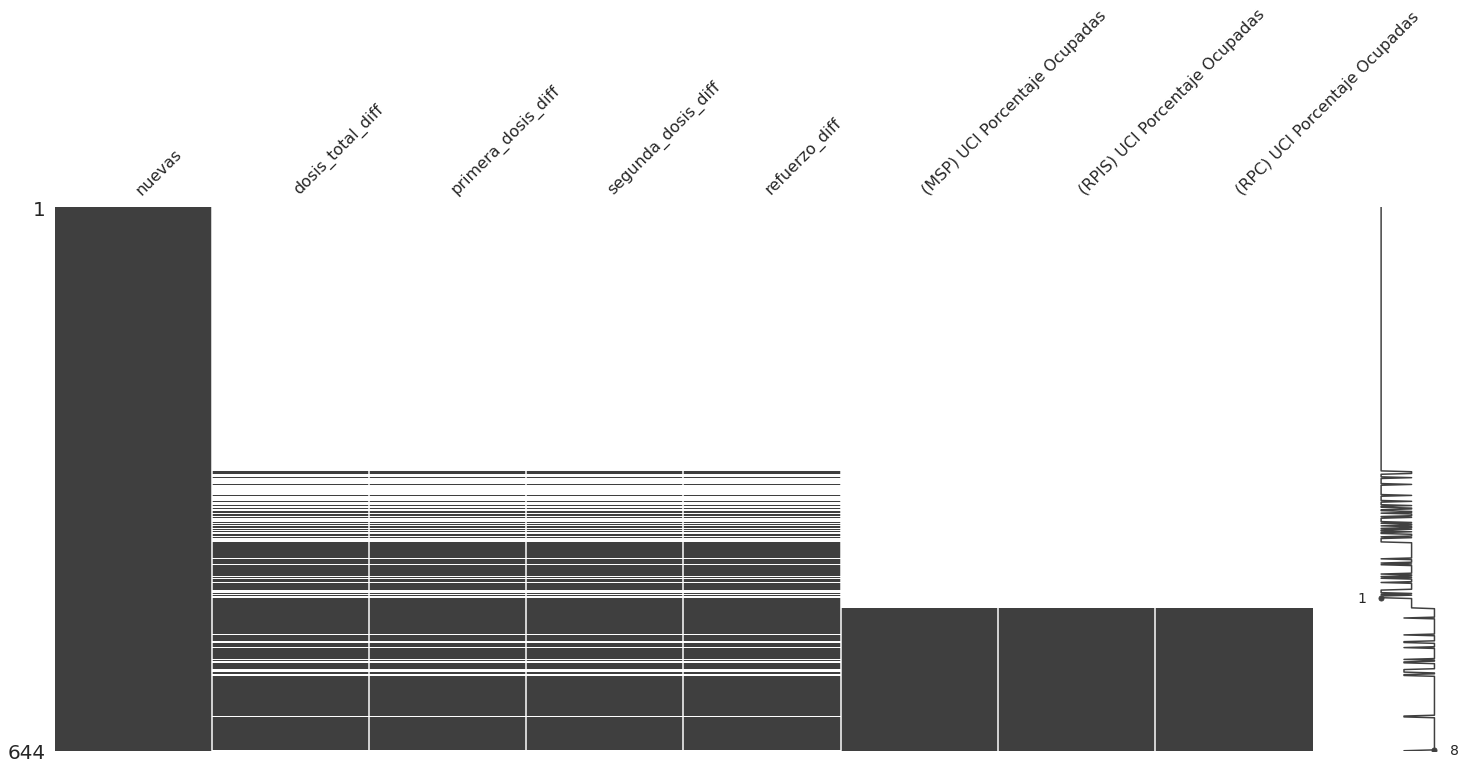

In [29]:
msno.matrix(df)
plt.show()

Data imputation techniques: http://www.stat.columbia.edu/~gelman/arm/missing.pdf

As we can see there's a lot of missing data and this can bias our model. But, we can easily fill those gaps, but how? What criteria will we use?

* Doses missing data are 0. It's because there wasn't vaccines during those days.
* UCI capacity missing data are 100. There was a collapse of health system, but this data is not recorded here. Anyway, those values won't be replaced with 100, since we couldn't find a reliable source.
* For new infections I will use the median, so I won't bias this variable.


In [30]:
df[['nuevas']] = df[['nuevas']].fillna(np.nanmedian(df.nuevas))

In [31]:
df[['dosis_total_diff', 'primera_dosis_diff', 'segunda_dosis_diff', 'refuerzo_diff']] = df[['dosis_total_diff', 'primera_dosis_diff', 'segunda_dosis_diff', 'refuerzo_diff']].fillna(0)

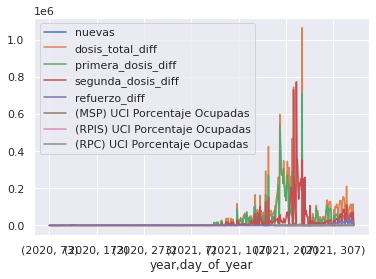

In [32]:
df.plot()
plt.show()

### Export data

In [33]:
df.to_csv('/work/covid-19-EC-provinces/data/interim/df_unified.csv', index=False)

In [34]:
df_icu_unified = df.dropna()

In [35]:
df_icu_unified.to_csv('/work/covid-19-EC-provinces/data/interim/df_icu_unified.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7294ef23-3287-47ac-a12f-ba892bffdf3b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>